In [1]:
import fastf1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Enable the cache
fastf1.Cache.enable_cache('cache')
# Load the session data
session = fastf1.get_session(2022, 'Saudi Arabia', 'R')
# Collect all race laps
laps = session.load()
laps = session.laps

core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 1 [v2.2.1]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '27', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '4', '3', '63', '77']


In [4]:
session.event.EventName

'Saudi Arabian Grand Prix'

In [7]:
#%matplotlib widget

m = 'MEDIUM'
s = 'SOFT'
h = 'HARD'

drivers = ['LEC', 'VER', 'HAM']
#laps.pick_driver(drivers[7])[{'Driver','TyreLife','LapNumber','LapTime','IsAccurate'}]#.pick_tyre(s)

ValueError: Found input variables with inconsistent numbers of samples: [12, 6]

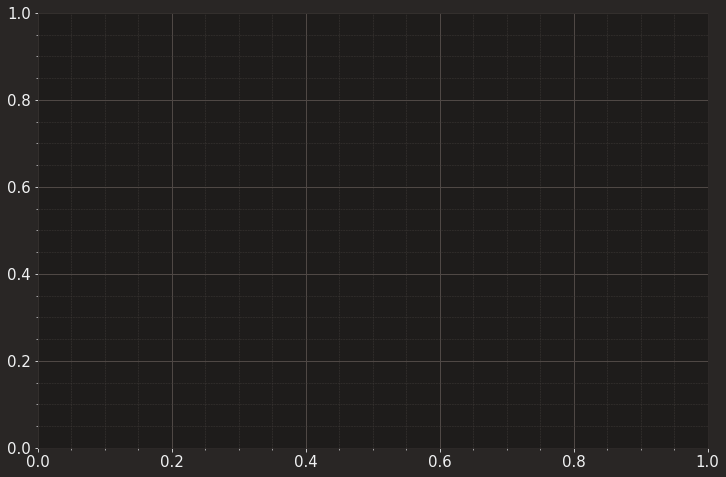

In [8]:
#

fig, ax = plt.subplots(figsize=(12, 8))
plotting.setup_mpl()
plt.rcParams['font.size'] = '15'
#plt.style.use('fivethirtyeight')

for driver in drivers:
    laps_driver = laps.pick_driver(driver)#.pick_tyre(m)
    laps_driver = laps_driver.loc[(laps_driver.IsAccurate==True) & (laps_driver.Stint==4) & (laps_driver.LapNumber>50)]
    laps_driver['laptimes'] = laps_driver.LapTime/np.timedelta64(1,'s')
    
    modeldriver = LinearRegression()
    xdriver = np.array([laps_driver.LapNumber.dropna()]).reshape(-1, 1)
    ydriver = np.array([laps_driver.laptimes.loc[~laps_driver.TyreLife.isna()]]).reshape(-1, 1)
    modeldriver.fit(xdriver, ydriver)
    modeldriver = LinearRegression().fit(xdriver, ydriver)
    
    xdriver_new = np.linspace(min(xdriver), max(xdriver), 100)
    ydriver_new = modeldriver.predict(xdriver_new[:])
    
    colordriver = plotting.team_color(pd.unique(laps_driver.Team)[0])
    
    ax.plot(laps_driver.LapNumber, laps_driver.laptimes, 'o', markersize=6, color = colordriver, label = driver)
    ax.plot(xdriver_new, ydriver_new, color=plotting.team_color(pd.unique(laps_driver['Team'])[0]), linewidth=3)
    ax.text(max(laps_driver.LapNumber), ydriver_new[len(ydriver_new)-1], 
            f'{driver} +{abs(np.round(modeldriver.coef_[0][0], 2))} s', color = colordriver)
    
    #print(f'{driver} R2: {np.round(modeldriver.score(xdriver, ydriver), 2)}')
    
ax.set_xlabel('Lap')
ax.set_ylabel('Lap time (s)')
#ax.legend()
ax.set_title(f'{session.event.EventName} Stint 4')
    
plt.savefig('racepace_chart_stint 4.png', dpi=300)

plt.show()